## Análisis Exploratorio de los Datos (EDA)

###  realizamos un análisis exploratorio para entender las relaciones entre variables, detectar valores atípicos y tendencias, y obtener una visión general del dataset.

In [7]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')


In [8]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Titanic-Dataset.csv')

In [9]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
# Descripción estadística del dataset
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


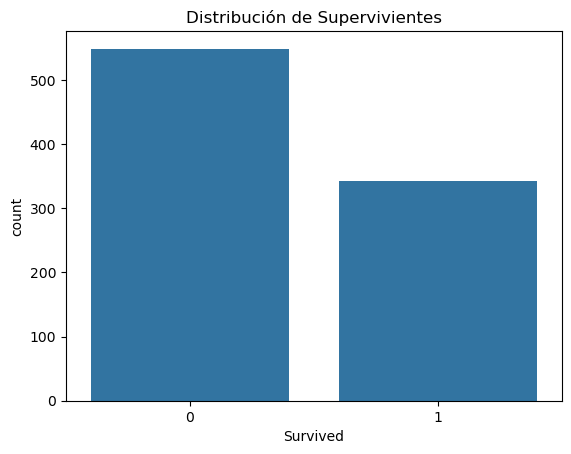

In [11]:
# Visualización de la distribución de la variable de interés 'Survived'
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivientes')
plt.show()

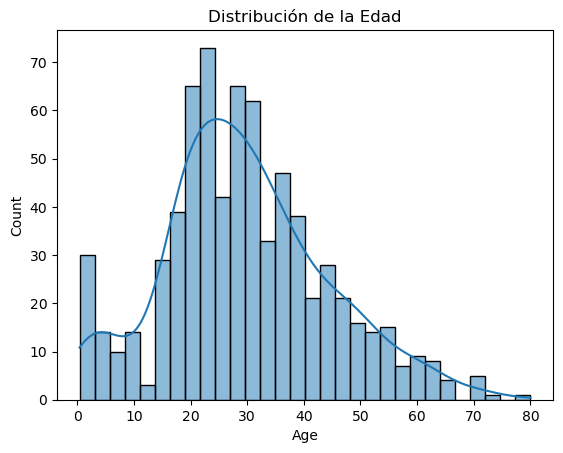

In [13]:
# Visualización de la distribución de la edad
sns.histplot(data['Age'].dropna(), kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.show()

## Preprocesamiento de los Datos

### En esta etapa, limpiamos y preprocesamos los datos, manejamos los valores faltantes y transformamos las variables según sea necesario.

In [16]:
# Manejo de valores faltantes
data['Age'].fillna(data['Age'].mean(), inplace=True)  # Rellenar valores faltantes de 'Age' con la media
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Rellenar valores faltantes de 'Embarked'

# Codificar la variable 'Sex' a valores numéricos (0 para femenino, 1 para masculino)
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# Codificar 'Embarked' (convertir a variables dummy)
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Ver cómo queda el dataset después del preprocesamiento
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN       False        True  
1          PC 17599  71.2833   C85       False       False  
2  STON/O2. 3101282   7.9250   NaN       False        True  
3            113803  53.1000  C123       False      

## Selección de Características Relevantes

### En este paso, seleccionamos las características más relevantes para el modelo. Esto puede implicar la eliminación de columnas innecesarias, como el Name, Ticket, y Cabin, que no aportan mucha información al modelo.

In [18]:
# Selección de las características relevantes para el modelo
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

## Dividir el Dataset en Train y Test

### Se debe dividir el conjunto de datos en un conjunto de entrenamiento (train) y otro de prueba (test) para evaluar correctamente el desempeño del modelo.

In [19]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenar el Modelo (Árboles de Decisión)

### Ahora entrenamos el modelo de Árboles de Decisión utilizando el conjunto de entrenamiento. Este modelo es adecuado para problemas de clasificación como el de la supervivencia del Titanic.

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluación del Desempeño del Modelo

### Evaluamos el modelo utilizando métricas como precisión, recall, F1-score y la matriz de confusión. Esto nos da una idea clara de cómo está funcionando el modelo.

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predecir sobre el conjunto de test
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}')

# Reporte de métricas: precisión, recall, F1-score
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

Precisión: 0.79
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

[[88 17]
 [20 54]]


## Visualización de los Resultados

### Realizamos una visualización de la matriz de confusión para ver cómo se distribuyen las predicciones.